# 数据读取和探索性分析

此说明主要帮助大家理解：
- 如何在Python中读取数据分析所需的module
- 如何进行数据读取
- 如何对数据进行清理
- 如何获取csv、txt文件中的时间、空间信息
- 如何进行初步的数据探索和可视化
- 后续分析的思考方向

数据的读取、分析、可视化的方式（代码）并不是唯一的。大家可以探索其他更便捷、有趣的数据分析和展示方式。

若有相关问题，欢迎邮件联系：sihan.mao@gmail.com (毛思汗)

## 1.环境准备

In [108]:
#载入所需module
import pandas as pd
import geopandas as gpd
import shapely.wkt
import contextily as ctx
import matplotlib.pyplot as plt
import datetime as dt

## 2.数据读取

### 1) 读取各选题数据

In [138]:
##选题1: 移动环境传感器
df = pd.read_csv('project-data/topic1-mobile_sensor/patrol_data.csv', sep=',')
##选题2: 井点1号小微空间，以秋千为例
qq = pd.read_csv('project-data/topic2-wellno1/data_jingdian1_qiuqian1_m1_2020q4.txt', delimiter = '\t')
##选题3：话单
hd = pd.read_csv('project-data/topic3-huadan/huadan_shuangjing_q1.csv', sep=',')

### 2) 读取双井街道数据


In [157]:
#读取双井街道边界数据
sj = pd.read_csv('project-data/shuangjing/shuangjing_boundary.csv', sep=',')
geometry = sj['geom'].map(shapely.wkt.loads)
sj = sj.drop('geom', axis=1)
gsj = gpd.GeoDataFrame(sj, crs="EPSG:4326", geometry=geometry)

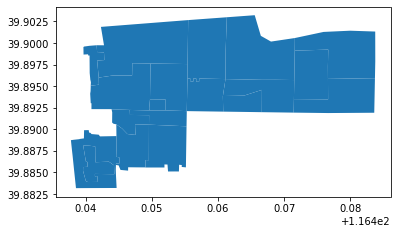

In [156]:
gsj.plot()

In [182]:
#读取双井街道小区数据
xq = pd.read_csv('project-data/shuangjing/sj_xq_2021.csv', sep=',')
geometry = xq['geom_xq'].map(shapely.wkt.loads)
xq = xq.drop('geom_xq', axis=1)
gxq = gpd.GeoDataFrame(xq, crs="EPSG:4326", geometry=geometry)

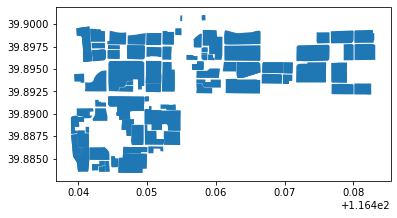

In [183]:
gxq.plot()

In [180]:
xq.columns

Index(['id', 'geom_xq', 'fid', 'nm_xq', 'id_xq', 'lon_earth', 'lat_earth',
       'lon_mars', 'lat_mars', 'id_county', 'nm_county', 'nm_shangqu',
       'manage_com', 'bld_area', 'r_green', 'plot_ratio', 'dishang', 'dixia',
       'n_parking', 'n_bld', 'n_hhld', 'year_built', 'fee', 'n_sale', 'n_rent',
       'developer', 'price', 'yt_bieshu', 'yt_gongyu', 'yt_pingfan',
       'yt_zhuzhai', 'yt_shangye', 'yt_shangzh', 'yt_siheyua', 'id_xq_old',
       'id_beike', 'yt_unkow_1', 'area_beike', 'area_xq', 'area_ratio',
       'avg_area', 'unit_rent', 'id_shp', 'id_shp2', 'id_shp.1', 'nm_village',
       'nm_town', 'nm_county.1', 'nm_busi_in', 'dis_tam', 'area'],
      dtype='object')

**思考题**：整理数据中关于小区特征的指标，如房价、容积率、停车位数量等信息，在后续话单数据或传感器数据中加以利用和分析

In [160]:
#读取双井街道POI数据
poi = pd.read_csv('project-data/shuangjing/sj_poi_amap_2021.csv', sep=',')
geometry = poi['geom'].map(shapely.wkt.loads)
poi = poi.drop('geom', axis=1)
gpoi = gpd.GeoDataFrame(poi, crs="EPSG:4326", geometry=geometry)

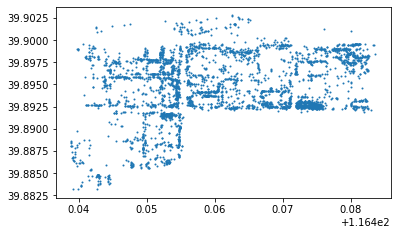

In [162]:
gpoi.plot(markersize=1)

In [166]:
gpoi.type_ret.value_counts()

生活服务;美容美发店;美容美发店           410
通行设施;临街院门;临街院门             332
餐饮服务;中餐厅;中餐厅               274
餐饮服务;快餐厅;快餐厅               183
交通设施服务;停车场;公共停车场           143
                          ... 
餐饮服务;快餐厅;永和豆浆                1
公共设施;公共厕所;婴儿换洗间/哺乳室/母婴室      1
金融保险服务;保险公司;中国人民保险公司         1
生活服务;事务所;评估事务所               1
购物服务;超级市场;百佳超市               1
Name: type_ret, Length: 202, dtype: int64

**思考题**：清理POI数据中的设施种类，如提取第一个和第二个分号之间的种类信息，以便后续分析

In [173]:
#读取双井街道建筑物数据
bd = pd.read_csv('project-data/shuangjing/sj_building_amap_2021.csv', sep=',')
geometry = bd['geom'].map(shapely.wkt.loads)
bd = bd.drop('geom', axis=1)
gbd = gpd.GeoDataFrame(bd, crs="EPSG:4326", geometry=geometry)

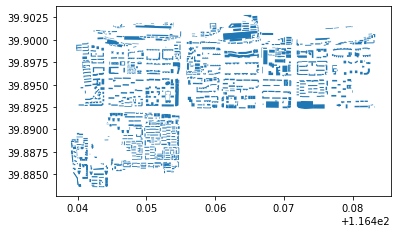

In [176]:
gbd.plot()

### 3）选题数据表头

In [101]:
#移动环境传感器样例
df.head()

,Unnamed: 0,mmac,est,humi,pm10,pm25,temp,wifi,noise,yiwei,wktstr,est_ts
0,0,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:06,96.11,142.2,121.6,13.10,79,63.5,0.0129,POINT(116.457510833333 39.9007768333333),2021-03-15 07:36:06
1,1,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:16,95.01,144.8,122.6,13.20,60,62.9,0.0124,POINT(116.457510833333 39.9007768333333),2021-03-15 07:36:16
2,2,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:26,92.80,141.0,110.0,13.28,60,61.7,0.0084,POINT(116.457510833333 39.9007768333333),2021-03-15 07:36:26
3,3,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:36,90.92,144.1,107.5,13.35,68,61.2,0.0070,POINT(116.457510833333 39.9007768333333),2021-03-15 07:36:36
4,4,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:46,89.60,153.2,120.9,13.43,44,61.5,0.0079,POINT(116.457510833333 39.9007768333333),2021-03-15 07:36:46


In [100]:
#井点秋千数据样例
qq.head()

,mmac,est_utc,est,qiuqian1
0,581a328bcacf4f209f976608d047e677,1599555662,2020/9/8 17:01:02,28
1,581a328bcacf4f209f976608d047e677,1599555672,2020/9/8 17:01:12,28
2,581a328bcacf4f209f976608d047e677,1599555682,2020/9/8 17:01:22,28
3,581a328bcacf4f209f976608d047e677,1599555694,2020/9/8 17:01:34,29
4,581a328bcacf4f209f976608d047e677,1599555704,2020/9/8 17:01:44,28


In [139]:
#话单数据样例
hd.head()

,id_grid,sst_date,number_hd,work,home,age,gender,belong_city,count_hd,lon_earth,...,nm_huan,dis_tam,build_zone,id_countyb,nm_countyb,nm_build_z,id_city,nm_city,dis_county,id_countybz
0,116.44429_39.896088,1/1/2019 0:00,999,就业非此地,居住非此地,60+,女,北京市,1,116.444290,...,四环内,5101.484809,1,110105001,朝阳区建成区,建成区,1.101000e+11,北京,2.980379,110105001
1,116.442154_39.892583,1/1/2019 0:00,122,就业非此地,居住非此地,45-60,女,北京市,1,116.442154,...,四环内,5101.484809,1,110105001,朝阳区建成区,建成区,1.101000e+11,北京,2.980379,110105001
2,116.452833_39.898424,1/1/2019 0:00,110,就业非此地,居住非此地,45-60,男,天津市,1,116.452833,...,四环内,4972.451476,1,110105001,朝阳区建成区,建成区,1.101000e+11,北京,2.483755,110105001
3,116.452833_39.898424,1/1/2019 0:00,110,就业非北京,居住非北京,25-44,男,邯郸市,1,116.452833,...,四环内,4972.451476,1,110105001,朝阳区建成区,建成区,1.101000e+11,北京,2.483755,110105001
4,116.452833_39.898424,1/1/2019 0:00,110,就业非此地,居住非此地,25-44,男,北京市,1,116.452833,...,四环内,4972.451476,1,110105001,朝阳区建成区,建成区,1.101000e+11,北京,2.483755,110105001


## 3.数据清理，获取空间、时间信息

In [121]:
#移动环境监测数据的空间坐标
geometry = df['wktstr'].map(shapely.wkt.loads)
df = df.drop('wktstr', axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
#去除多余column
gdf=gdf.drop('Unnamed: 0', axis = 1)

In [50]:
#将string变为timestamp
gdf['est_ts'] = pd.to_datetime(gdf['est_ts'],format='%Y-%m-%d %H:%M:%S.%f')

In [57]:
#将每个监测时间分类为早中晚
gdf = gdf.assign(session=pd.cut(gdf.est_ts.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [58]:
#清理后数据样式
gdf.head()

,mmac,est,humi,pm10,pm25,temp,wifi,noise,yiwei,est_ts,geometry,session
0,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:06,96.11,142.2,121.6,13.10,79,63.5,0.0129,2021-03-15 07:36:06,POINT (116.45751 39.90078),Morning
1,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:16,95.01,144.8,122.6,13.20,60,62.9,0.0124,2021-03-15 07:36:16,POINT (116.45751 39.90078),Morning
2,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:26,92.80,141.0,110.0,13.28,60,61.7,0.0084,2021-03-15 07:36:26,POINT (116.45751 39.90078),Morning
3,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:36,90.92,144.1,107.5,13.35,68,61.2,0.0070,2021-03-15 07:36:36,POINT (116.45751 39.90078),Morning
4,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:46,89.60,153.2,120.9,13.43,44,61.5,0.0079,2021-03-15 07:36:46,POINT (116.45751 39.90078),Morning


In [15]:
#环境数据的坐标系信息
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

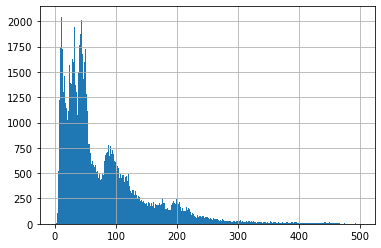

In [110]:
#pm2.5 数值在500以内的分布
gdf[gdf.pm25 < 500]['pm25'].hist(bins=400)

## 思考题
- 各观测值的分布是怎样的？在全样本下的分布、在不同日期中的分布等方式
- 各观测值的有没有过高或过低的数值？什么时候出现的？在哪里出现的？
- 针对判断出的异常值的特征，适当清理数据集，为后续分析做准备

## 4.数据的初步可视化

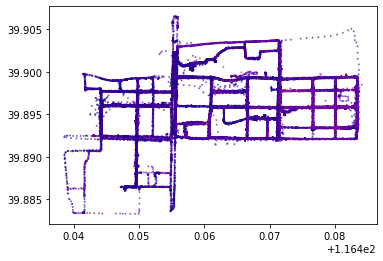

In [48]:
#样本所有数据的pm2.5信息
gdf.plot(column='pm25',cmap='plasma', markersize=1, alpha=0.5)

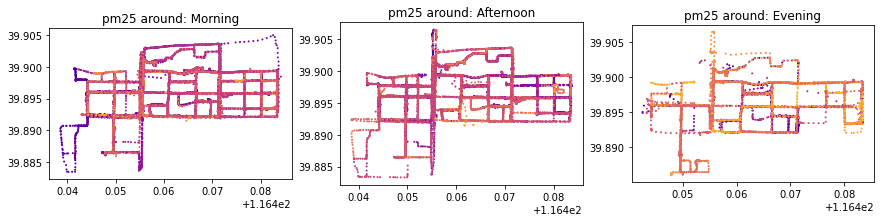

In [88]:
#分时段的pm25信息
fig, axs = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(20, 25)  #set it big enough for all subplots

ss = ['Morning','Afternoon','Evening']
count = 0

for icol in range(axs.shape[0]):
    #print(icol, irow)
    if count<len(ss):
        # plot that session on current axes
        gdf[gdf['session'] == ss[count]].plot(column='pm25', ax=axs[icol], markersize=1, cmap='plasma')
        axs[icol].set_title('pm25 around: '+ss[count])
        count +=1
    else:
        # hide extra axes
        axs[icol].set_visible(False)

plt.show()

## 思考题

- 如何给上面的地图增加底图，同时确保美观且不干扰主要展示信息
- 不同地点的数据强度（观测值的密度）是如何变化的？哪些地点观测值多，哪些地点观测值少？
- 整个数据的时间跨度是多少？各观测值有没有周期性规律？
- 各观测值在同一天内有何变化规律？
- 温度、空气质量、噪音等观测值在哪些地点、哪些路段比较高？为什么？还需要哪些信息去判断原因？
- 结合街道内poi、路网等数据，初步验证你的想法
- 可否根据街道的环境品质，对区域内的道路进行分类或打分？

......

---

## 5.话单数据

In [140]:
# 话单数据中的列信息
hd.columns

Index(['id_grid', 'sst_date', 'number_hd', 'work', 'home', 'age', 'gender',
       'belong_city', 'count_hd', 'lon_earth', 'lat_earth', 'geom', 'id',
       'geom.1', 'id_shp', 'nm_village', 'id_village', 'id_town', 'area',
       'id_county', 'nm_county', 'nm_town', 'nm_busi_in', 'nm_busi_to',
       'nm_huan', 'dis_tam', 'build_zone', 'id_countyb', 'nm_countyb',
       'nm_build_z', 'id_city', 'nm_city', 'dis_county', 'id_countybz'],
      dtype='object')

In [141]:
# 将dataset中以string形式存在的空间坐标，转换为geopandas中的geometry
geometry = hd['geom'].map(shapely.wkt.loads)
hd = hd.drop('geom', axis=1)

ghd = gpd.GeoDataFrame(hd, crs="EPSG:4326", geometry=geometry)
#ghd=ghd.drop('Unnamed: 0', axis = 1)

In [143]:
# 话单数据中各类热线、紧急电话的数量
hd.number_hd.value_counts()

110         1779
12345       1267
122         1156
96777       1144
12315        583
120          424
96116        369
96069        263
12320        102
96310         80
999           70
119           61
12369         48
12350          3
69738604       1
Name: number_hd, dtype: int64

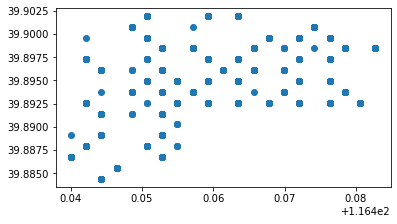

In [142]:
ghd.plot()

## 思考题
- 每个点包含单个还是多个话单数据？
- 每类电话反映了什么样的问题？
- 话单数据在时间上的分布有无规律？以不同月份、一天中的不同时段来看
- 话单数据在空间上的分布有无规律？以不同小区来看

......

## 6. 小微空间传感器数据

以秋千为例，陀螺仪、蹦床等数据集请自行分析

In [186]:
qq['est'] = pd.to_datetime(qq['est'], format='%Y/%m/%d %H:%M:%S')

In [187]:
qq = qq.set_index('est')

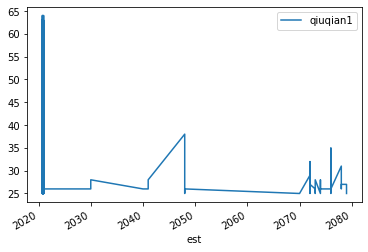

In [190]:
qq.plot(y='qiuqian1')

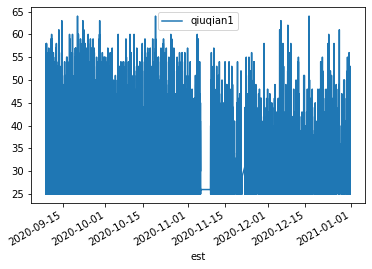

In [195]:
qq[qq.index < '2021-05-15'].plot(y='qiuqian1')

### 思考题
- 学会将2020年第四季度数据和2021年数据合并
- 上图中数据的异常是什么？
- 设施的传感器数据在时间上是否时连续的？
- 每类设施在一天的不同时间段的使用频率是怎样的？早中晚
- 每类设施在不同月份、季节的使用频率有无总体趋势上的变化
- 每类设施的使用频率是否有相关性